In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/kaggle/input/electric-vehicle-specifications-and-prices/EV_cars.csv')

In [3]:
df.columns

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [4]:
df.rename(columns={'Battery':'Battery',
                         'Car_name':'Car', 
                         'Car_name_link':'Link', 
                         'Efficiency':'Efficiency', 
                         'Fast_charge':'Fast Charge',
                        'Price.DE.': 'Price', 
                         'Range': 'Range', 
                         'Top_speed': 'Top Speed', 
                         'acceleration..0.100.':'Acceleration'
    
}, inplace = True)

In [5]:
df.dtypes

Battery         float64
Car              object
Link             object
Efficiency        int64
Fast Charge     float64
Price           float64
Range             int64
Top Speed         int64
Acceleration    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Battery       360 non-null    float64
 1   Car           360 non-null    object 
 2   Link          360 non-null    object 
 3   Efficiency    360 non-null    int64  
 4   Fast Charge   358 non-null    float64
 5   Price         309 non-null    float64
 6   Range         360 non-null    int64  
 7   Top Speed     360 non-null    int64  
 8   Acceleration  360 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 25.4+ KB


In [7]:
df.head()

,Battery,Car,Link,Efficiency,Fast Charge,Price,Range,Top Speed,Acceleration
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [8]:
df.shape

(360, 9)

In [9]:
# Check NA values
df.isna().sum()

Battery          0
Car              0
Link             0
Efficiency       0
Fast Charge      2
Price           51
Range            0
Top Speed        0
Acceleration     0
dtype: int64

In [10]:
# Handle missing values
df.dropna(subset=['Price'], inplace=True)

In [11]:
# filter out the missing record
missing_price_records = df[df.isna().any(axis = 1)]

missing_price_records.head()

,Battery,Car,Link,Efficiency,Fast Charge,Price,Range,Top Speed,Acceleration
49,21.3,Renault Twingo Electric,https://ev-database.org/car/1270/Renault-Twing...,158,NaN,28000.0,135,135,12.6
264,27.0,e.Go e.wave X,https://ev-database.org/car/1896/eGo-ewave-X,180,NaN,24990.0,150,135,12.0


In [12]:
# Split data into features and target variable
X = df[['Battery']]  # Feature(s) used for prediction
y = df['Price']      # Target variable


In [13]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Training SVM model
svm_model = svm.SVR()
svm_model.fit(X_train, y_train)

SVR()

In [16]:
# Evaluate model
train_score = svm_model.score(X_train, y_train)
test_score = svm_model.score(X_test, y_test)
print("Train R^2 Score:", train_score)
print("Test R^2 Score:", test_score)


Train R^2 Score: -0.08632129114006148
Test R^2 Score: -0.08748276109714626


In [17]:
# Predict missing values
predicted_values = svm_model.predict(X_scaled)

In [18]:
predicted_values

array([57069.16195565, 57002.596571  , 57011.5463763 , 57015.63876151,
       57069.16195565, 57002.596571  , 57052.87348716, 57024.13630856,
       56991.5951448 , 57094.51896198, 57089.29634237, 57009.92136073,
       57026.86282934, 57024.13630856, 57069.16195565, 57027.25679941,
       57111.32241133, 57065.19973109, 57002.01871055, 57101.53402063,
       57111.32241133, 57011.5463763 , 57003.94797913, 57027.93140617,
       57090.80982425, 57089.29634237, 56990.84622063, 57041.55291928,
       57107.01522551, 57024.13630856, 56989.83843996, 57016.70141778,
       57065.19973109, 57076.75915217, 57102.18088609, 57100.90253184,
       56990.84622063, 57094.51896198, 57076.75915217, 57029.64195247,
       57003.94797913, 56992.03073551, 57111.18902213, 56990.00000008,
       57100.67440619, 57034.26664032, 57076.75915217, 57103.52693247,
       57020.13215679, 57036.15174815, 57065.19973109, 57065.19973109,
       57065.19973109, 56990.84622063, 57104.61439567, 56998.75605566,
      

In [19]:
# Add predicted values back to original DataFrame
df['Predicted_Price'] = predicted_values

In [20]:
df

,Battery,Car,Link,Efficiency,Fast Charge,Price,Range,Top Speed,Acceleration,Predicted_Price
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0,57069.161956
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1,57002.596571
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3,57011.546376
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9,57015.638762
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4,57069.161956
...,...,...,...,...,...,...,...,...,...,...
355,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1,56990.000000
356,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1,56990.000000
357,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1,56990.000000
358,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3,57040.300420


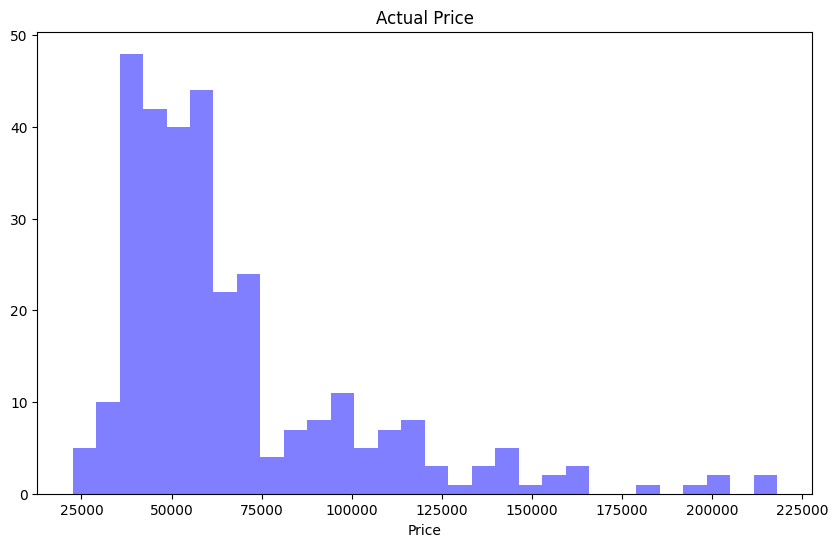

In [21]:
#adjusted the figure size 

plt.figure(figsize = (10,6))

# plot historgram to compare actual

plt.hist(df['Price'], bins = 30, alpha = 0.5, color = 'blue',label = 'Actual Price')


# Add labels and titles 
plt.xlabel('Price')
plt.title('Actual Price')
plt.legend

#show plt
plt.show()


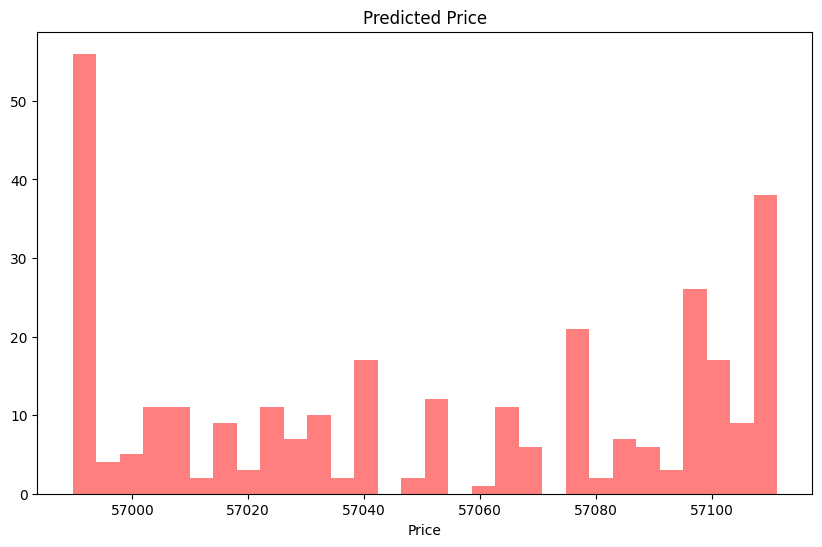

In [22]:
#adjusted the figure size 

plt.figure(figsize = (10,6))

# plot historgram predicted prices
plt.hist(df['Predicted_Price'], bins = 30, alpha = 0.5, color = 'red', label = 'Predicted Price')

# Add labels and titles 
plt.xlabel('Price')
plt.title( 'Predicted Price')
plt.legend

#show plt
plt.show()
